# Data Exploration (2) 

This notebook explores the train datase, looking for insights and correlations

## Imports

In [9]:
%matplotlib inline 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from extract import extract, DOWNLOAD_PATH, SPOTIFY_DATASET
from data_cleaning import clean_data
from split_test_train import perform_test_train_split

## Load the data

In [2]:
data = extract(SPOTIFY_DATASET, DOWNLOAD_PATH, True)
data = clean_data(data)
test, train = perform_test_train_split(data)

100%|██████████| 8.17M/8.17M [00:00<00:00, 17.5MB/s]

Extracting files...


In [3]:
train.head()

,track_id,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_name_sentiment
0,5SuOikwiRyPMVoIQDJUgSV,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,0.3612
1,4qPNDBW1i3p13qLCt0Ki3A,Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,-0.3182
2,1iJBSr7s7jYXzM8EGcbK5b,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,0.0000
3,6lfxq3CG4xtTiEg7opyCyx,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,0.5245
4,5vjLSffimiIP26QG5WcN2K,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,0.0000


## Look for correlations

Visualising the relationship between different non-target variables. The pearson r coefficient is checked.

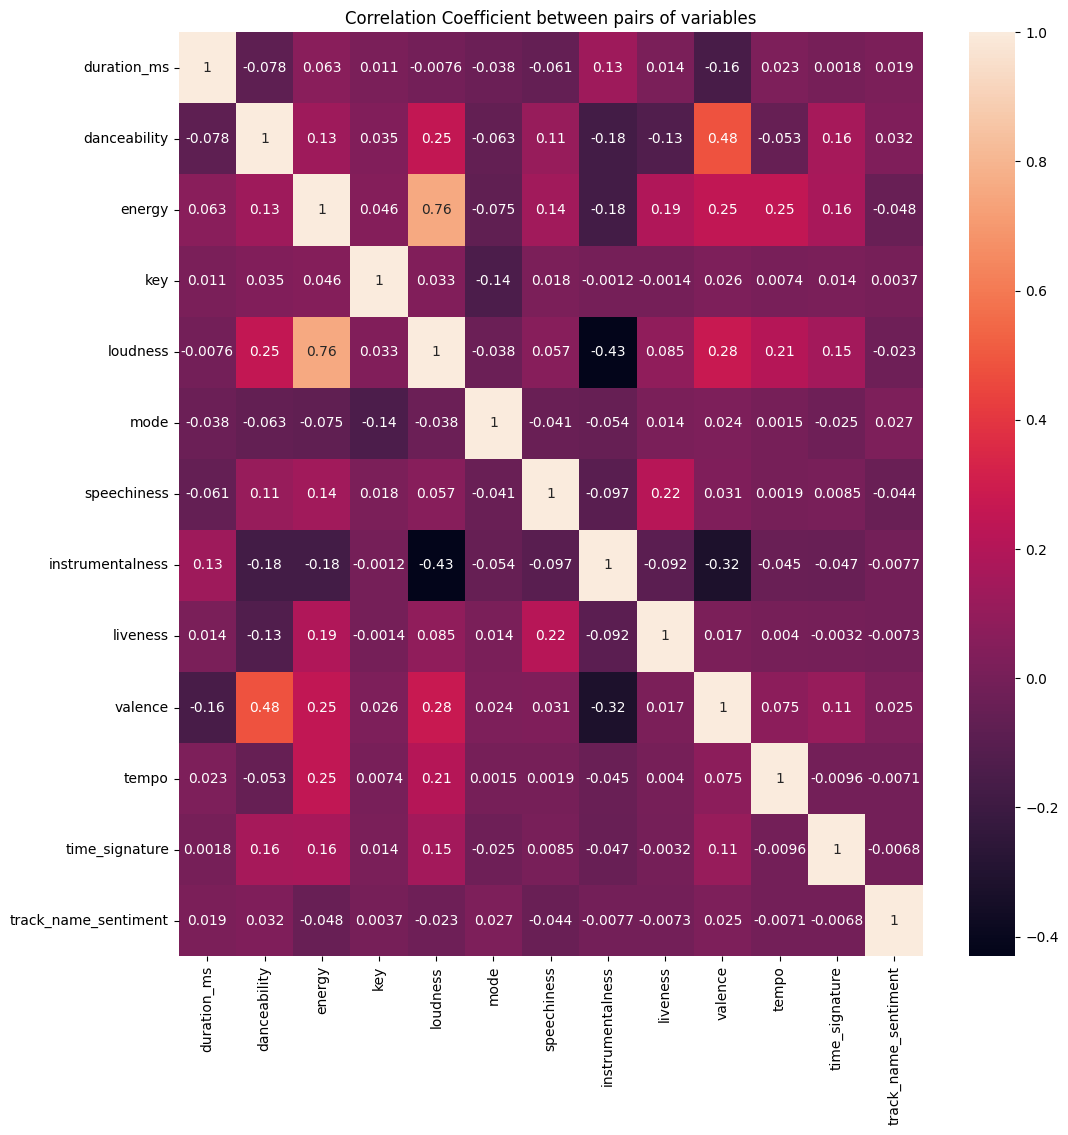

In [26]:
attributes = ["duration_ms","danceability","energy","key","loudness","mode","speechiness","instrumentalness","liveness","valence","tempo","time_signature","track_name_sentiment"]

plt.figure(figsize=(12,12))
plt.title("Correlation Coefficient between pairs of variables")
sns.heatmap(train[attributes].corr(), annot=True)
plt.show()

Energy and loudness are strongly correlated.

<Axes: xlabel='loudness', ylabel='energy'>

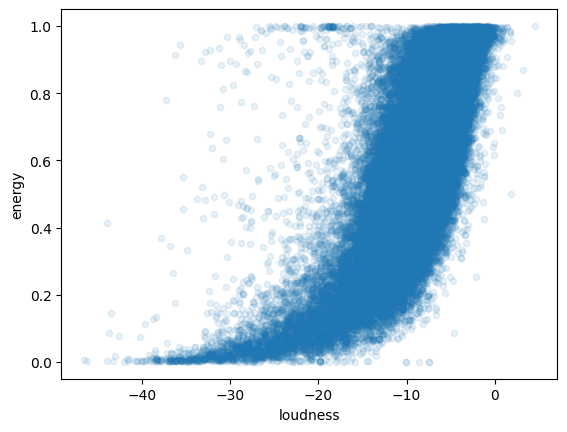

In [17]:
train.plot(kind='scatter',x='loudness',y='energy',alpha = 0.1)

## Experimenting with attribute combinations

In [42]:
import itertools
data_with_compounds = train.copy()
attribute_pairs = list(itertools.combinations(attributes,2))
compound_attributes = []
for pair in attribute_pairs:
    compound = f"{pair[0]}_to_{pair[1]}"
    compound_attributes.append(compound)
    data_with_compounds[compound] = train[pair[0]]/train[pair[1]]

data_with_compounds[['popularity']+attributes + compound_attributes].corr()['popularity'].sort_values(ascending=False, key=abs).head(20)

popularity                            1.000000
instrumentalness                     -0.123862
instrumentalness_to_time_signature   -0.121949
instrumentalness_to_tempo            -0.110600
instrumentalness_to_liveness         -0.105509
danceability_to_speechiness           0.081621
loudness_to_time_signature            0.073708
energy_to_speechiness                 0.072282
loudness                              0.071510
loudness_to_tempo                     0.061888
loudness_to_mode                      0.061127
duration_ms_to_danceability          -0.060230
danceability                          0.060086
duration_ms_to_instrumentalness       0.058990
danceability_to_mode                  0.053981
energy_to_instrumentalness            0.053055
danceability_to_time_signature        0.051349
danceability_to_instrumentalness      0.051294
loudness_to_liveness                  0.050033
danceability_to_tempo                 0.049295
Name: popularity, dtype: float64

The `danceability_to_speechiness` feature correlates better with popularity than `dabceability` or `speechiness`, so it might be worth adding that as an attribute later on. 